# 데이터 로드 및 전처리

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size = 0.25)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [3]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, label in enumerate(data):
        results[i, label] = 1
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

from keras.utils.np_utils import to_categorical
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

# 모델 구성 및 컴파일

In [4]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2

# 모델 학습

In [5]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 3s 7ms/step - loss: 1.8118 - accuracy: 0.6311 - val_loss: 1.5006 - val_accuracy: 0.7289
Epoch 2/60
211/211 [==============================] - 1s 5ms/step - loss: 0.8371 - accuracy: 0.8171 - val_loss: 0.9994 - val_accuracy: 0.7858
Epoch 3/60
211/211 [==============================] - 1s 5ms/step - loss: 0.5415 - accuracy: 0.8792 - val_loss: 0.9824 - val_accuracy: 0.8099
Epoch 4/60
211/211 [==============================] - 1s 5ms/step - loss: 0.3884 - accuracy: 0.9139 - val_loss: 1.0062 - val_accuracy: 0.8050
Epoch 5/60
211/211 [==============================] - 1s 5ms/step - loss: 0.2968 - accuracy: 0.9323 - val_loss: 1.0199 - val_accuracy: 0.8085
Epoch 6/60
211/211 [==============================] - 1s 5ms/step - loss: 0.2619 - accuracy: 0.9363 - val_loss: 1.0333 - val_accuracy: 0.8014
Epoch 7/60
211/211 [==============================] - 1s 5ms/step - loss: 0.2226 - accuracy: 0.9476 - val_loss: 1.0709 - val_accuracy: 0.8081
Epoch 

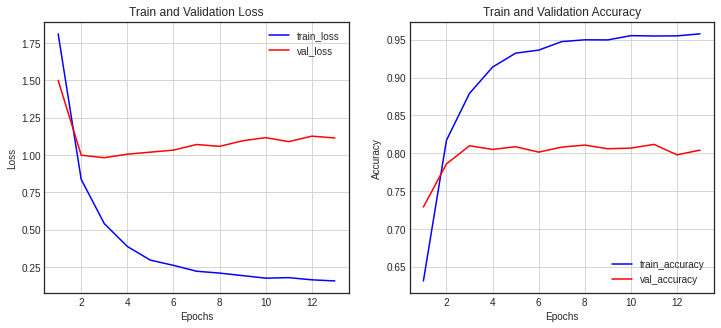

In [6]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델 평가 및 예측

In [7]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0373 - accuracy: 0.7850


[1.0373274087905884, 0.7849510312080383]